# Ceasarian section classification
<img src="https://www.todaysparent.com/wp-content/uploads/2017/06/Forceps-deliveries-1024x576-1496764741.jpg" title="Womb of a pregnant woman" />
PHOTO: ISTOCKPHOTO
## 1. Aim and objectives
In order to help a pregnant woman deliver her baby, ceasarian section (C-section) might be needed. We'd like to assess whether the need for C-section can be predicted, based on 5 main health features of the woman: Age, delivery number, delivery time, blood pressure and heart status. This could help assist medical staff take operational decision, and also provide pregnant women with more information about likelihood of need for C-section.
Our objectives is to:
1. Understand the data available
2. Test rapidly different classification models
3. Assess the best model(s) and improve them
4. Present the results and what could be further addressed.

The source of data is the __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset)__. There are 80 instances, which have 5 attributes: 

| Attribute | Value | Meaning |
| --- | --- |
| Age | { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 } | No of years |
| Delivery number | { 1,2,3,4 } | No of prior deliveries |
| Delivery time | { 0,1,2 } | {0 = timely , 1 = premature , 2 = latecomer} |
| Blood of Pressure | { 2,1,0 } | {0 = low , 1 = normal , 2 = high } |
| Heart Problem | { 1,0 } | {0 = apt, 1 = inept } |

We have the information on the occurence or not of a C-section with the dependent variable Caesarian taking the values of 0 for no C-section and 1 for the occurence of C-section.

# 2. Exploratory data analysis
## Load the dataset
We use the pandas library to load the dataset.

In [1]:
import pandas as pd
path = "/Users/linetonthat/ds_training/projects/2019-04-01_C-section/2_prepared_data/"
filename = "caesarian.csv"
df = pd.read_csv(path+filename, header = None, skiprows = 17,
                 names = ['Age','Delivery number','Delivery time','Blood pressure', 'Heart problem', 'Caesarian'])

In [2]:
df.head()

,Age,Delivery number,Delivery time,Blood pressure,Heart problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [3]:
len(df)

80

## Duplicates
We look for duplicates to check if there are cases when all the input variables (conditions and history of the pregnant woman) are the same and the output variable is different (occurence of C-section).

In [4]:
df['is_duplicated'] = df.duplicated()

In [5]:
df['is_duplicated'].value_counts()

False    76
True      4
Name: is_duplicated, dtype: int64

There are 4 duplicates. Let's have a look at them.

In [6]:
df[df['is_duplicated']==1].head()

,Age,Delivery number,Delivery time,Blood pressure,Heart problem,Caesarian,is_duplicated
47,32,2,0,2,1,1,True
61,19,1,0,1,0,1,True
71,29,1,2,0,1,1,True
72,28,2,0,1,0,0,True


Now, we check if there are duplicates when we look at the dataset without the outcome ('Caesarian' columnn).

In [7]:
df['duplicated_condition'] = df.drop(['Caesarian', 'is_duplicated'], axis = 1).duplicated()
df['duplicated_condition'].value_counts()

False    72
True      8
Name: duplicated_condition, dtype: int64

In [8]:
df[df['duplicated_condition']==1].head()

,Age,Delivery number,Delivery time,Blood pressure,Heart problem,Caesarian,is_duplicated,duplicated_condition
47,32,2,0,2,1,1,True,True
48,26,2,2,1,0,0,False,True
61,19,1,0,1,0,1,True,True
67,29,2,0,1,1,0,False,True
68,25,1,0,0,0,1,False,True


There are also 4 duplicates. These duplicates are the same as the ones when we look at the whole dataset, meaning that cases where two pregnant women had the same features (health conditions and delivery history), the occurence or not of C-section was the same.
## Visualising health conditions and delivery history

We look at the main statistics of the quantitative attributes: Age and number of prior deliveries.

In [9]:
df[['Age','Delivery number','Caesarian']].describe()

,Age,Delivery number,Caesarian
count,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.575000
std,5.017927,0.794662,0.497462
min,17.000000,1.000000,0.000000
25%,25.000000,1.000000,0.000000
50%,27.000000,1.000000,1.000000
75%,32.000000,2.000000,1.000000
max,40.000000,4.000000,1.000000


Ages range from 17 to 40 years old, with an average of 27.7 years old. All women had at least one prior delivery, the mean being 1.66 prior deliveries and the max being 4 prior deliveries.

In [10]:
# Breakdown of C-section occurences or not
df['Caesarian'].value_counts()/80

1    0.575
0    0.425
Name: Caesarian, dtype: float64

Now, we plot the distribution of all the variables.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

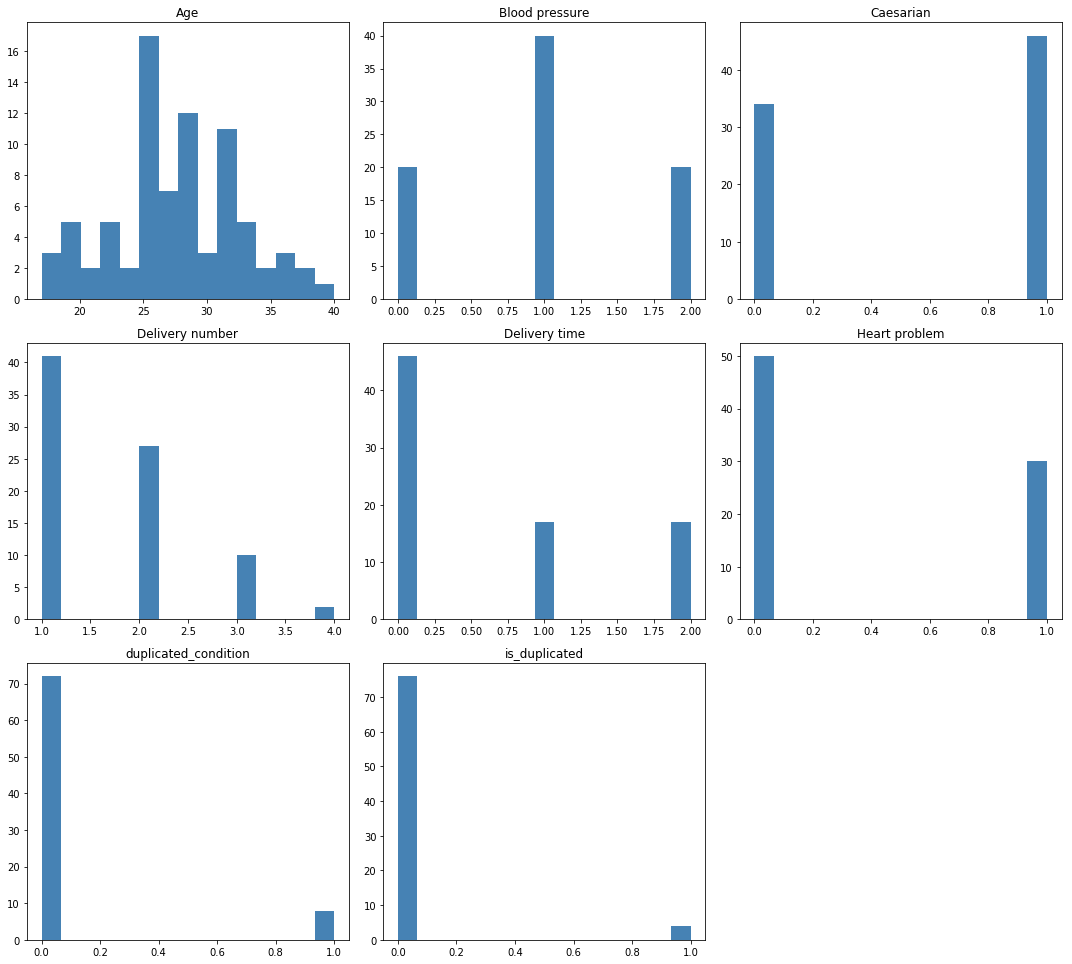

In [12]:
fig = df.hist(bins=15,
                 color='steelblue',
                 #edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 #xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

Our main comments on the dataset are:
* Almost 50% of pregnant women have normal blood pressure. The numbers of women with low and high blood pressure are in the same order of magnitude.
* 50% of women had exactly one prior delivery.
* More than 50% of pregnant women have timely delivery time. The numbers of women with premature and latecomer delivery times are in the same order of magnitude.
* The majority of women has no heart problem.
* The majority of women had a Caesarian section (57.5%).

## Age and number of prior deliveries
We check the relationship between age and number of prior deliveries.

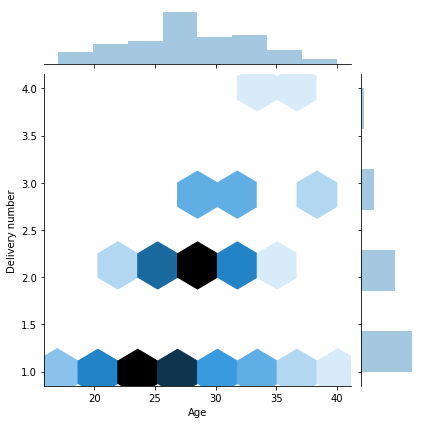

In [13]:
sns.jointplot(x='Age',y='Delivery number',data=df,kind='hex')

As expected, the younger women are, the lower is the number of prior deliveries.

## Age vs occurence of C-section

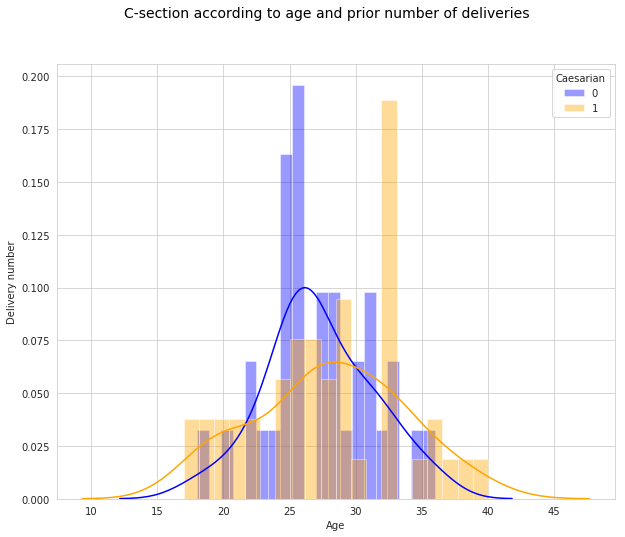

In [14]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("C-section according to age and prior number of deliveries", fontsize=14)
sns.set_style('whitegrid')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel("Delivery number") 

g = sns.FacetGrid(data=df, 
                  hue='Caesarian', 
                  palette={1: "orange", 0: "blue"})

g = g.map(sns.distplot,'Age',bins=20,ax=ax)
ax.legend(title='Caesarian')
plt.close(2)

There are numerous cases of women aged around 25 years old who didn't have C-section, while there are numerous cases of women aged 32 years old who had a C-section. 
Women over 36 years old all had C-section.

## Number of prior delivery vs occurence of C-section

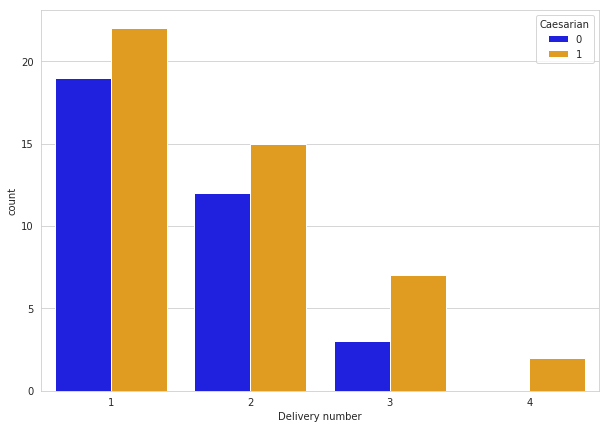

In [15]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="Delivery number", 
                   hue="Caesarian", 
                   palette={1: "orange", 0: "blue"})

## Blood pressure and delivery time
We use a grid to plot the data as follows:
* by column: blood pressure (0 = low, 1 = normal, 2 = high)
* by row: delivery time (0 = timely, 1 = premature , 2 = latecomer) 

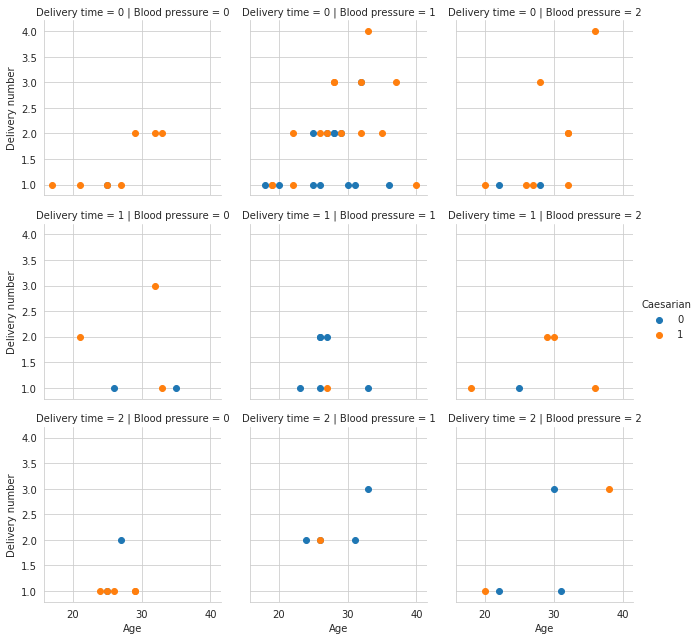

In [17]:
g = sns.FacetGrid(df, col="Blood pressure",  row="Delivery time",hue='Caesarian')
g = g.map(plt.scatter, "Age", "Delivery number").add_legend()

Our main comments on the dataset are:
* One out of 6 pregnant women with normal blood pressure and premature delivery time had a C-section.
* One out of 4 pregnant women with normal blood pressure and latecomer delivery time had a C-section.
* Most pregnant women with high blood pressure and premature or timely delivery time had a C-section. The need of C-section is more balanced for pregnant women with high blood pressure and latecomer delivery time.
 * I'd thought that pregnant women with latecomer delivery time and high blood pressure would have had the same proportion or even a higher number of C-sections than pregnant women with premature or timely delivery time and high blood pressure.
* All the pregnant women with low blood pressure and timely delivery time had a C-section.
* Most pregnant women with low blood pressure and premature or latecomer delivery time had a C-section.
 * <b> Low blood pressure seems to be positively highly correlated with the need for C-section.</b>
 
## Overview of the data

In [18]:
sorted_df = df.sort_values(by = ["Blood pressure",
                                 "Heart problem",
                                 'Caesarian',
                                #"Age", 
                                 "Delivery time",
                                "Delivery number",])

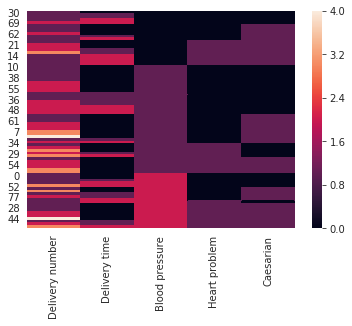

In [19]:
import seaborn as sns
sns.heatmap(sorted_df.drop(['Age','is_duplicated','duplicated_condition'], axis = 1))

Now that we have a good understanding of our data, let's take a look at how we could classify the pregnant women and try to guess if they would need a C-section!